# Quick Start

Molass Library is designed to achieve the following motto:

> Easy things should be easy, and hard things should be possible.

which is a quote from Larry Wall, the creator of the Perl language.
Although Perl gave way to Python and we will use Python, this motto is ubiquitous in software library design.

Here in this chapter, we will show the easy part to give an idea of what it is all about.
If the input data are well conditioned, this will suffice to get what you will expect in ordinary use.
However, life is not so easy and that is why the hard part exists, which we will discuss in the later chapters.

## Installation

We assume you have already installed Python and you are familiar with [Jupyter Notebook](https://en.wikipedia.org/wiki/Project_Jupyter#Jupyter_Notebook).

To install the Molass Library package, you can use pip as follows:

```console
pip install -U molass
pip install -U molass_data
```

```{note}
The molass_data package includes some data sets for this tutorial.
```

## Tools for Jupyter Notebooks

For programming in Jupyter Notebooks, we recommend either of the following tools (other alternatives are also possible):

* [Jupyter Lab](https://jupyter.org/)
* [Jupyter Extension in VS Code](https://code.visualstudio.com/docs/datascience/jupyter-notebooks)

We recommend using Jupyter notebooks mainly for the following reason:

* Interactive Exploration with Visualization

Notebooks let you write and run code in small, manageable cells. You can experiment with different parameters, immediately see the results, and iteratively refine your analysis—most importantly, **all of this without restarting your workflow from scratch**. This makes it easy to test ideas, debug, and learn by doing.


## Straightforward Usage
### Plot the Input Data

We can plot the data set as follows. The format of this data set is specified in the chapter 4 of [MOLASS User's Guide](https://pfwww.kek.jp/saxs/software/MOLASS-UsersGuide-1_0_13.pdf).


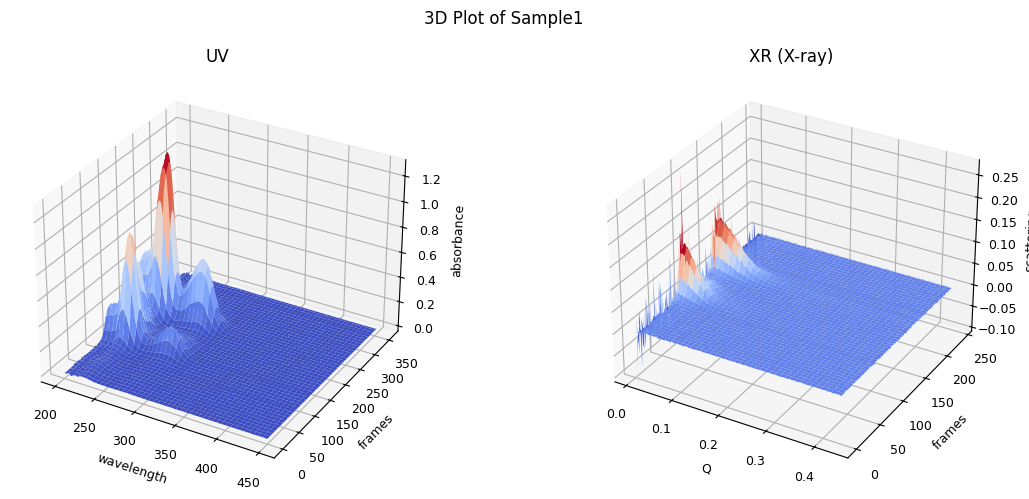

In [1]:
from molass import get_version
assert get_version() >= '0.6.1', "This tutorial requires molass version 0.6.1 or higher."
from molass_data import SAMPLE1
from molass.DataObjects import SecSaxsData as SSD
ssd = SSD(SAMPLE1)
ssd.plot_3d(title="3D Plot of Sample1");

### Trimming, Correction and LRF

For simplicity, we assume here that the data set contains two components because we observe two chromatographic peaks, ignoring the bump observed on the right side of the first peak.
To obtain a set of well-estimated scattering curves for each component, we usually need to apply three steps: trimming, baseline correction, and LRF (low rank factorization).
We can execute these steps and show the results as follows. The details of each step will be explained in later chapters.

zeros at the angular ends of error data have been replaced with the adjacent values.
developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


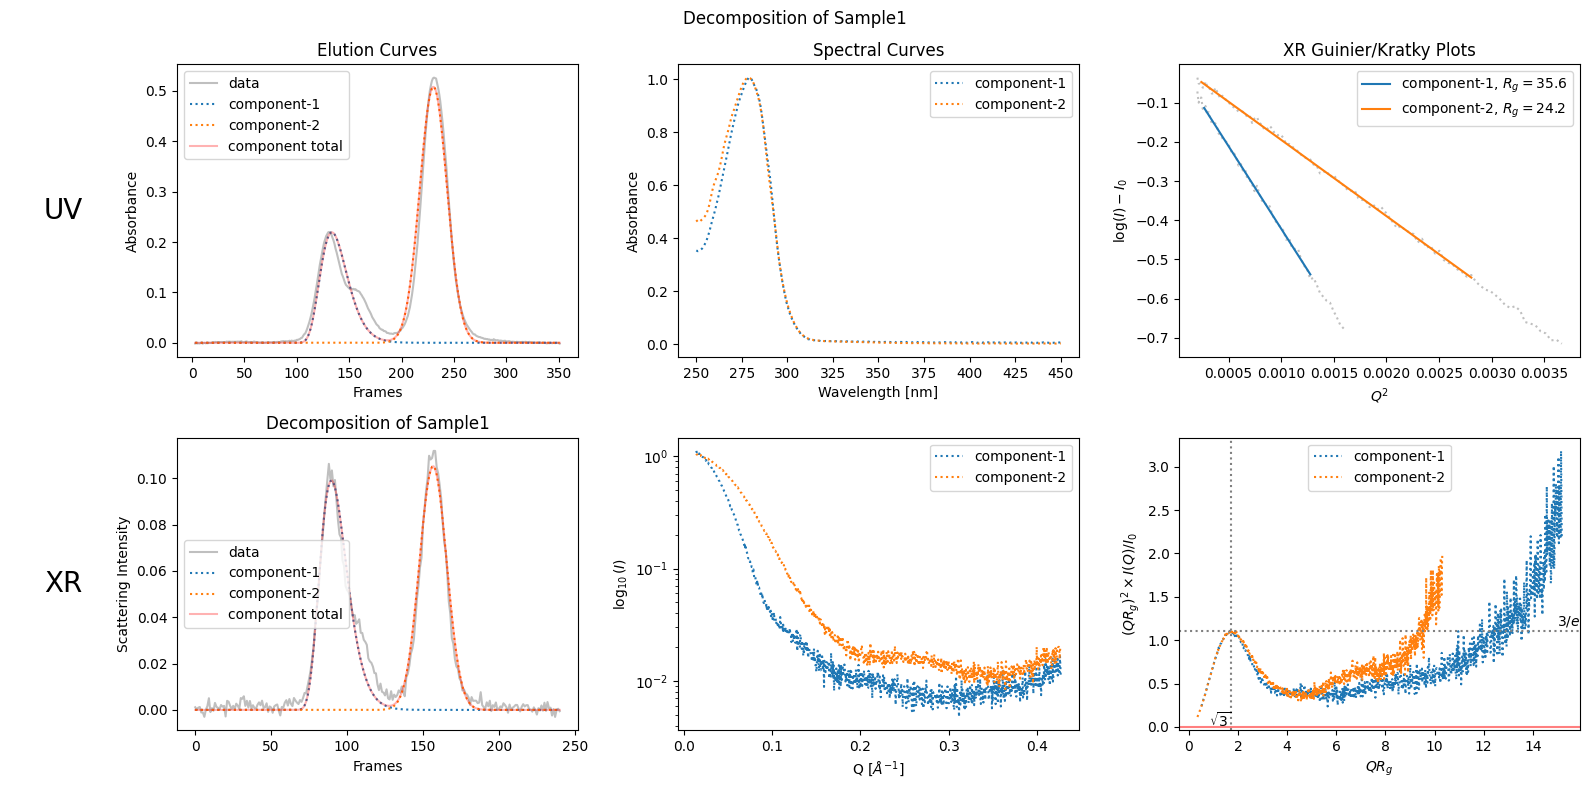

In [2]:
trimmed_ssd = ssd.trimmed_copy()
corrected_ssd = trimmed_ssd.corrected_copy()
decomposition = corrected_ssd.quick_decomposition()
decomposition.plot_components(title="Decomposition of Sample1");

### Running DENSS

From the result of LRF, which is expressed as "decomposition" here in the python code, we can obtain scattering curves of each component.
Once you have a well-conditioned scattering curve, you can reconstruct the original electron density distribution using an appropriate SAXS tool.
In Molass Library, you can use [DENSS](https://tdgrant.com/) directly as follows.

In [3]:
from molass.SAXS.DenssTools import run_denss
# Get, for example, the first component's scattering curve as an array
jcurve_array = decomposition.get_xr_components()[0].get_jcurve_array()
output_folder = "temp"
run_denss(jcurve_array, output_folder=output_folder)

Dmax = 142.89
Number of experimental Shannon channels: 19
Number of calculated Shannon channels: 58


 Step     Chi2     Rg    Support Volume
 ----- --------- ------- --------------
  620   4.67e-02  81.98        1669519            
switched to shrinkwrap by density threshold = 0.2000
  999   3.95e-05  36.06        365395          EC: 1 -> 1 
 2463   1.81e-05  36.40        320321          

### Plotting the DENSS Result

The DENSS result can be visualized as follows.

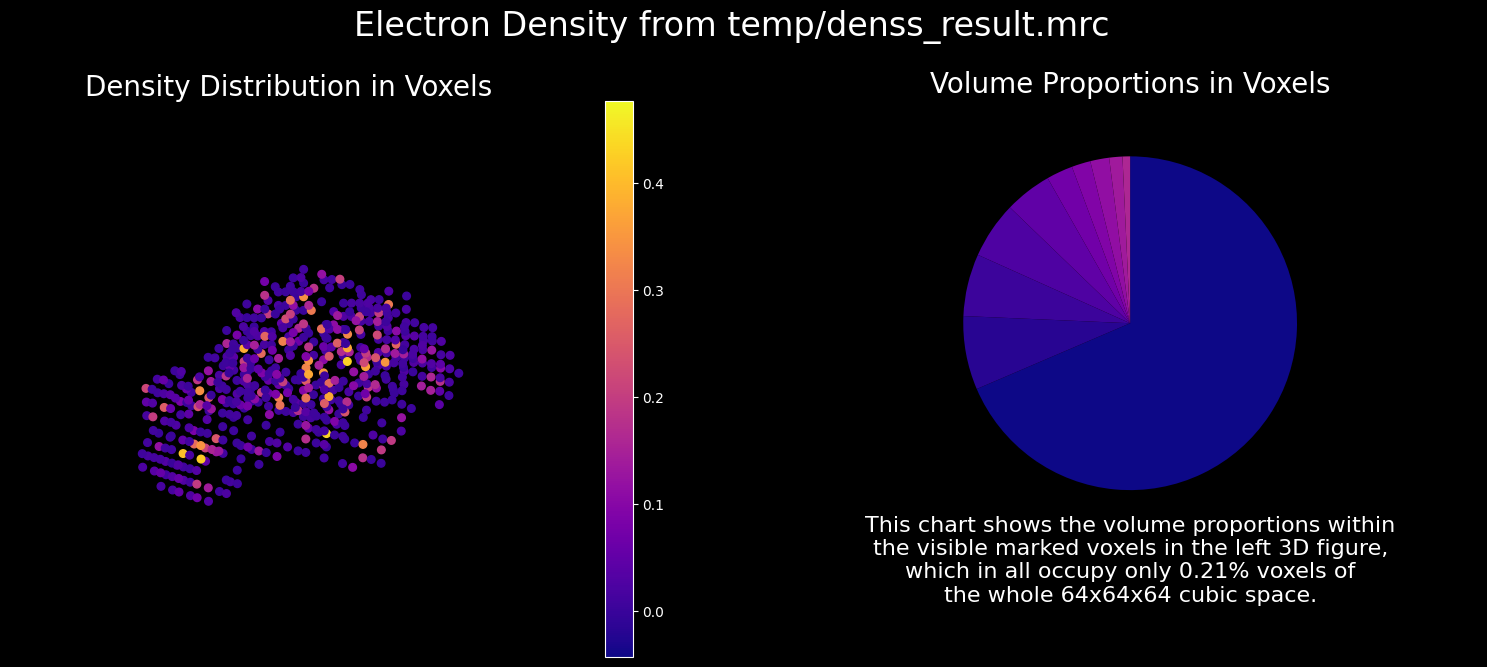

In [4]:
import matplotlib.pyplot as plt
from molass.SAXS.MrcViewer import show_mrc
# Uncomment the following magic command line if you want to use an interactive plot in Jupyter Notebook
# %matplotlib widget
show_mrc(output_folder + '/denss_result.mrc');

## How to Refine

There are several aspects that can be improved, such as:

1. Data Selection (Trimming)
2. Baseline Correction
3. Decomposition of Overlapping Peaks
4. Interparticle Interactions (Concentration Dependence)

In the straightforward usage shown above, the parameters on these factors are determined roughly in favor of simplicity and speed.

However, if you want to be more precise and decide that the observed bump should be considered as a sign of a separate component, you can specify the number of components as follows.

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.


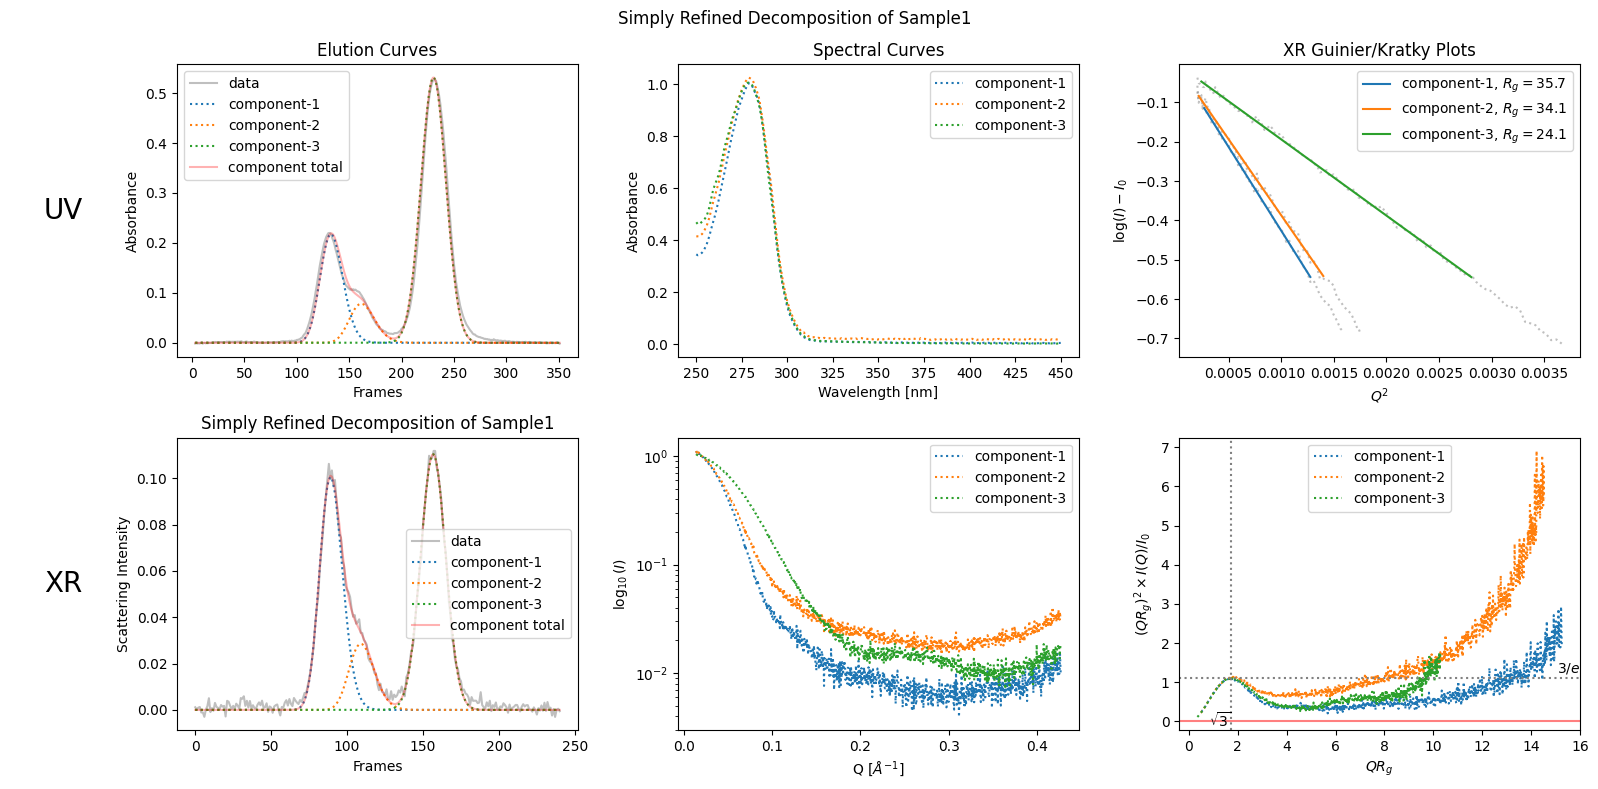

In [5]:
simply_refined_decomposition = corrected_ssd.quick_decomposition(num_components=3)
simply_refined_decomposition.plot_components(title="Simply Refined Decomposition of Sample1");

Molass Library provides several other options and methods for better estimation of scattering curves which we will discuss one by one in later chapters.

## How to Export

As we have passed the decomposed data to DENSS above, `jcurve_array` is the commonly used portable style which consists of the three column vectors, namely, [qvector, intensities, errors]. Do as follows, for example, to export the all decomposed scattering curves.

In [6]:
import numpy as np
for i, comp in enumerate(simply_refined_decomposition.get_xr_components()):
    jcurve_array = comp.get_jcurve_array()
    np.savetxt(f"component_{i+1}.dat", jcurve_array)

## How to Customize

If you want to try this straightforward usage for your data, you will probably need to cumstomize for your data. In such cases, see the [Customization](https://freesemt.github.io/molass-technical/chapters/01/customization.html) chapter in the [Molass Technical Report](https://freesemt.github.io/molass-technical/).